## PAD - Project 1

In [3]:
# some librabries used for overall usage

import warnings
warnings.filterwarnings(action='ignore')


import statsmodels.api as sm
import scipy.stats as stats

import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d

### Reading data
https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set

Ambient temperature (AT) C \
Ambient pressure (AP) mbar \
Ambient humidity (AH) (%) \
Air filter difference pressure (AFDP) mbar \
Gas turbine exhaust pressure (GTEP) mbar \
Turbine inlet temperature (TIT) C \
Turbine after temperature (TAT) C \
Compressor discharge pressure (CDP) mbar \
Turbine energy yield (TEY) MWH \
Carbon monoxide (CO) mg/m3 \
Nitrogen oxides (NOx) mg/m3 

In [4]:
raw_data_2011 = pd.read_csv('gt_2011.csv')
raw_data_2011.insert(11,'Year',[2011]*len(raw_data_2011))

raw_data_2012 = pd.read_csv('gt_2012.csv')
raw_data_2012.insert(11,'Year',[2012]*len(raw_data_2012))

raw_data_2013 = pd.read_csv('gt_2013.csv')
raw_data_2013.insert(11,'Year',[2013]*len(raw_data_2013))

raw_data_2014 = pd.read_csv('gt_2014.csv')
raw_data_2014.insert(11,'Year',[2014]*len(raw_data_2014))

raw_data_2015 = pd.read_csv('gt_2015.csv')
raw_data_2015.insert(11,'Year',[2015]*len(raw_data_2015))

In [5]:
raw_data = pd.concat([raw_data_2011,raw_data_2012,raw_data_2013,raw_data_2014,raw_data_2015],ignore_index=True)

In [6]:
raw_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172,2015
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849,2015
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147,2015
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738,2015


### Data Visualization

<AxesSubplot:>

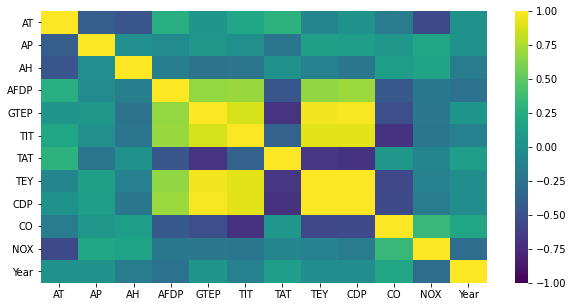

In [7]:
plt.figure(figsize=(10,5))

sns.heatmap(raw_data.corr(), cmap = 'viridis', vmin=-1, vmax=1)

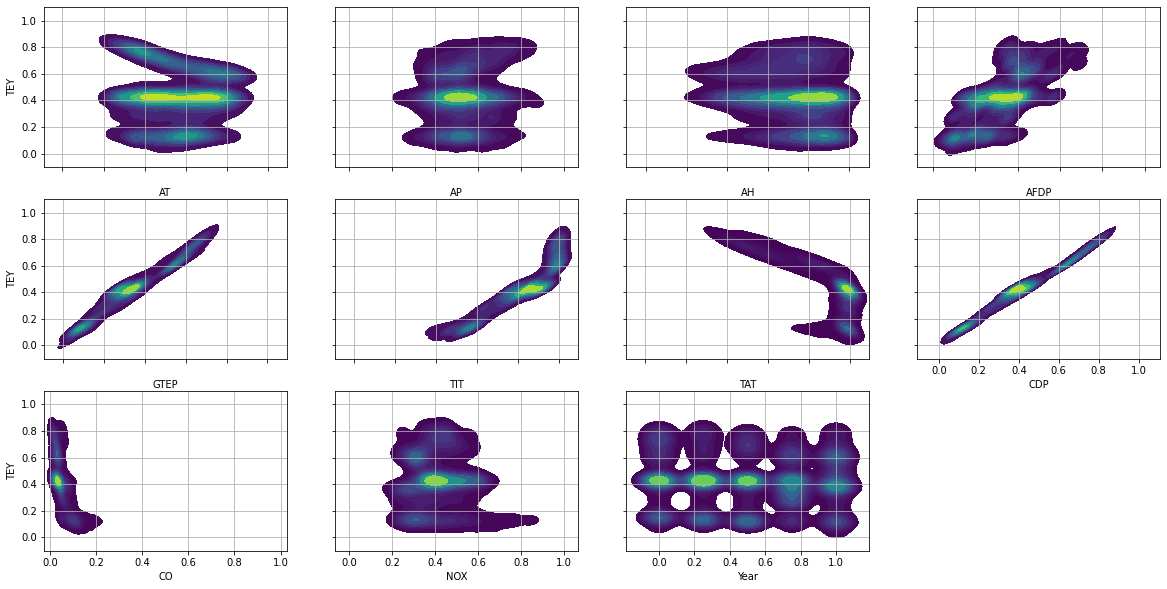

In [6]:
cols = raw_data.columns.delete(7)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_data = scaler.fit_transform(raw_data)
norm_data = pd.DataFrame(norm_data, columns= raw_data.columns)
plt.figure(figsize=(20,10))
for i in range(len(cols)):

    plt.subplot(3,4,i+1)
    sns.kdeplot(x = norm_data[cols[i]],y = norm_data['TEY'], fill=True, cmap='viridis')
    plt.xticks(ticks=[0.0,0.2,0.4,0.6,0.8,1.0])
    plt.grid(True)
    if i != 0 and i!= 4 and i!= 8:
        plt.ylabel('')
        plt.yticks(color ='white')

    if i < 7:
        plt.xticks(color = 'white')
        

Text(0, 0.5, 'Turbine energy yield (MWH)')

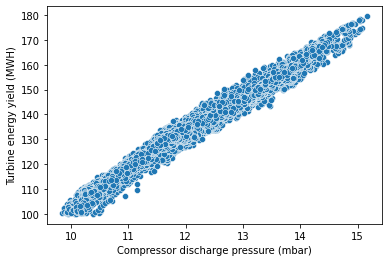

In [159]:
sns.scatterplot(raw_data['CDP'],raw_data['TEY'])
plt.xlabel('Compressor discharge pressure (mbar)')
plt.ylabel('Turbine energy yield (MWH)')
#cbar = plt.colorbar()
#cbar.set_label('Turbine energy yield (MWH)')


Text(0, 0.5, '')

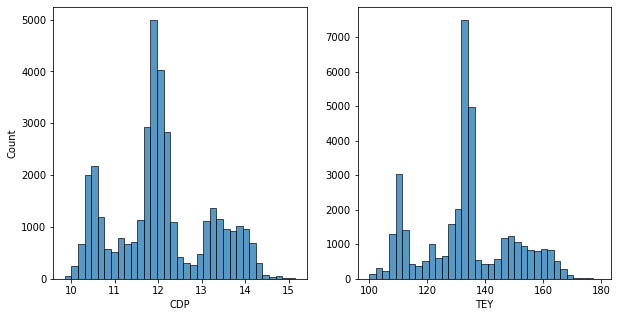

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(raw_data['CDP'],bins=35)
plt.subplot(1,2,2)
sns.histplot(raw_data['TEY'],bins=35)
plt.ylabel('')

# Regression Analysis

In [10]:
# Defining the variables that will be used y -> target, x -> variable to use to estimate the target
x = np.array(raw_data['CDP'].copy()); print('Initial shape of x:',x.shape)
y = np.array(raw_data['TEY'].copy()); print('Initial shape of y:',y.shape)

Initial shape of x: (36733,)
Initial shape of y: (36733,)


### Building a regression model with the normal variables

In [11]:
# using a built-in function from numpy polyfit, which does not require any change to data.
# X: vector or matrix to use to predict the target class.
# Y: target values / value that we want to predict.
# deg: Degree of the polynomial function that we want / coefficients.
# Returns the highest coefficients first 
coef = np.polyfit(x,y,1); print('b1:',coef[0],'b0',coef[1],'Nº coefs:',len(coef))

b1: 14.183895250898392 b0 -37.55882183993289 Nº coefs: 2


### The regression line is given by:

$\hat{y} = \beta_0 + \beta_1 x \ <=> \ \hat{y} = -37.56 + 14.18 x$ 

In [12]:
y_hat = x*coef[0]+coef[1]

### Let's plot our dataset and the regression line obtained

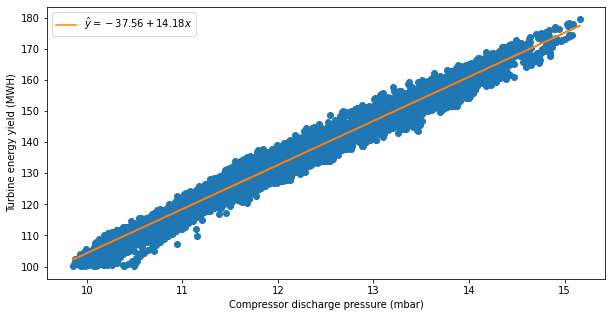

In [160]:
plt.figure(figsize=(10,5))

# Dataset
plt.plot(x,y,'o')

# Regression Line
plt.plot(x,y_hat, label = r'$\hat{y} = -37.56 + 14.18 x$ ')

# defining the label of the plot
plt.xlabel('Compressor discharge pressure (mbar)');plt.ylabel('Turbine energy yield (MWH)')
plt.legend()

### Check normality of the residuals

Text(0.5, 1.0, 'Standardized Residuals vs. Fits')

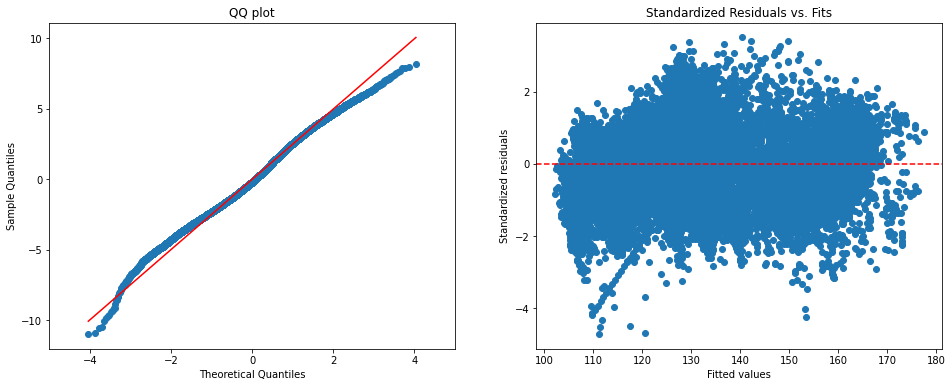

In [14]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
residuals = y - y_hat
degrees_of_freedom = len(x) - 2

sm.qqplot(residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'QQ plot') 
axs[0].set_xlim(-5,5)


# Calculate the standardized residuals manually
mean_resid = np.mean(residuals)
std_resid = np.std(residuals, ddof=1)
std_resid = residuals / std_resid

# Create the plot
plt.scatter(y_hat, std_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Standardized Residuals vs. Fits')

## Using the logarithmic transformation

b1: 1.2929793489525498 b0 1.6730576790944027 Nº coefs: 2


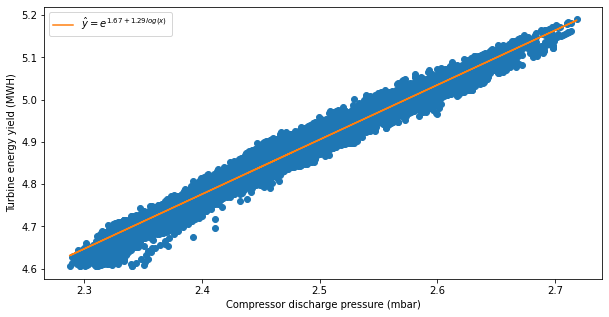

In [161]:
log_x = np.log(x)
log_y = np.log(y)

log_coef = np.polyfit(log_x,log_y,1); print('b1:',log_coef[0],'b0',log_coef[1],'Nº coefs:',len(log_coef))

log_y_hat = log_x*log_coef[0]+log_coef[1]

plt.figure(figsize=(10,5))
# Dataset
plt.plot(log_x,log_y,'o')

# Regression Line
plt.plot(log_x,log_y_hat, label = r'$\hat{y} = e^{1.67 + 1.29log(x)}$ ')

# defining the label of the plot
plt.xlabel('Compressor discharge pressure (mbar)');plt.ylabel('Turbine energy yield (MWH)')
plt.legend()

### Note that we are estimating the logarithmic turbine energy yield using the logarithmic compressor discharge pressure. In order to obtain the "normal" variables values the regression equation is given by: 

$ log(\hat{y}) =  1.67 + 1.29log(x) <=> \hat{y} = e^{1.67 + 1.29log(x)}$ 

### Let's check the residuals 

Text(0.5, 1.0, 'Standardized Residuals vs. Fits')

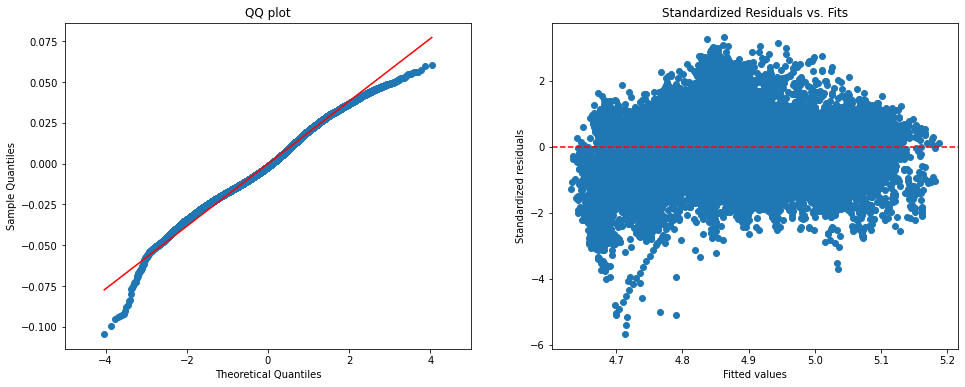

In [16]:
fig, axs = plt.subplots(ncols=2, # Set the number of columns to split the figure in
                        figsize=(16, 6)) # size of the whole figure

# re-computing our model values
log_residuals = log_y - log_y_hat

sm.qqplot(log_residuals, 
          stats.t,
          distargs=(degrees_of_freedom,), 
          line='q', 
          ax=axs[0])
axs[0].set_title(label = 'QQ plot') 
axs[0].set_xlim(-5,5)


# Calculate the standardized residuals manually
log_mean_resid = np.mean(log_residuals)
log_std_resid = np.std(log_residuals, ddof=1)
log_std_resid = log_residuals / log_std_resid

# Create the plot
plt.scatter(log_y_hat, log_std_resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Standardized residuals')
plt.title('Standardized Residuals vs. Fits')

In [17]:
### Comparar dois valores? 
### Exemplo regressão = e^log = real

### Now let's compare both models through the correlation and determinacy coefficients 

$r^2 = \frac{SSR}{SST} \ and \ r = sign(\beta_1) \sqrt{r^2}$ 

$SSR = \sum_{i=1}^{n} (\hat{y} - \overline{y})^2$

$SST = \sum_{i=1}^{n} (y - \overline{y})^2$

In [18]:
### Coeffiecients for the normal variables w/o log
print('Normal variables \n')
SSR = sum((y_hat-np.mean(y))**2); print('SSR:',SSR)

SST = sum((y-np.mean(y))**2); print('SST:',SST)

R2 = SSR/SST; R = np.sign(coef[0])*np.sqrt(R2); print(r'r^2:',np.round(R2*100,2),'%',r'r:',np.round(R*100,2),'%\n')

### Coeffiecients for the log variables
print('Log variables \n')
log_SSR = sum((log_y_hat-np.mean(log_y))**2); print('SSR:',SSR)

log_SST = sum((log_y-np.mean(log_y))**2); print('SST:',SST)

log_R2 = log_SSR/log_SST; log_R = np.sign(log_coef[0])*np.sqrt(log_R2); print(r'r^2:',np.round(log_R2*100,2),'%',r'r:',np.round(log_R*100,2),'%\n')



Normal variables 

SSR: 8760483.616160624
SST: 8960467.978567293
r^2: 97.77 % r: 98.88 %

Log variables 

SSR: 8760483.616160624
SST: 8960467.978567293
r^2: 97.57 % r: 98.78 %



### Let's test if there is any Linear Correlation between our variable and target
### Therefore, we will test the null hypothesis of:
$H_0: \beta_1 = 0, \ H_1: \beta_1 != 0$

the test is: 

$ t = \frac{b_1-\beta_1}{s_{b_1}}$

in this case, for testing non-linear relationship, $\beta_1 = 0$ and 

$ s_{b_1} = \frac{s}{\sqrt{\sum{x^2}-\frac{(\sum{x})^2}{n}}}$

$s = \sqrt{MSE}$

$MSE = \frac{SSE}{n-m-1}$

$SSE = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

In [19]:
SSE = sum((y-y_hat)**2); print('SSE:',SSE)

MSE = SSE/(len(x)-1-1); print('MSE:',MSE)

s = np.sqrt(MSE); print('s:',s)

sb1 = s/np.sqrt(sum(x**2)-sum(x)**2/len(x)); print('Sb1:',sb1)

t = (coef[0]-0)/sb1; print('T:',t)

pval = stats.t.sf(np.abs(t), degrees_of_freedom)*2; print('P-value:',pval)

SSE: 199984.36240667623
MSE: 5.444566235786563
s: 2.3333594313321218
Sb1: 0.011181835971651614
T: 1268.4764189760654
P-value: 0.0


In [20]:
log_SSE = sum((log_y-log_y_hat)**2); print('SSE:',log_SSE)

log_MSE = log_SSE/(len(log_x)-1-1); print('MSE:',log_MSE)

log_s = np.sqrt(log_MSE); print('s:',log_s)

log_sb1 = log_s/np.sqrt(sum(log_x**2)-sum(log_x)**2/len(log_x)); print('Sb1:',log_sb1)

log_t = (log_coef[0]-0)/log_sb1; print('T:',log_t)

log_pval = stats.t.sf(np.abs(log_t), degrees_of_freedom)*2; print('P-value:',log_pval)

SSE: 12.412993380140632
MSE: 0.0003379432463080404
s: 0.01838323274911245
Sb1: 0.0010657434653758623
T: 1213.2181814472087
P-value: 0.0


### After cheking the assumptions for the models, we can do inference. First, let's infere and find the confidence interval for the slope.

In [21]:
### Confidence interval for the slope under the normal variables for (95% confidence)
t_student_values = stats.t.ppf( [.025,.975], degrees_of_freedom)
ci_beta1 = coef[0]+(t_student_values*sb1); print('CI for Beta1',ci_beta1,'Beta0:',coef[0])

### Confidence interval for the slope under the log variables for (95% confidence)

log_ci_beta1 = log_coef[0]+(t_student_values*log_sb1); print('Log CI for Beta1',log_ci_beta1,'Beta0:',log_coef[0])

CI for Beta1 [14.16197853 14.20581197] Beta0: 14.183895250898392
Log CI for Beta1 [1.29089046 1.29506824] Beta0: 1.2929793489525498


### Confidence interval for the correlation coefficient 

In [22]:
### Confidence interval for the correlation coefficient under the normal variables for (95% confidence)

ci_corr = R + t_student_values*np.sqrt((1-R2)/(len(x)-2)); print('Correlation Coef. CI',ci_corr,'Correlation coef.',R)

### Confidence interval for the log correlation coefficient under the normal variables for (95% confidence)
log_ci_corr = log_R + t_student_values*np.sqrt((1-log_R2)/(len(log_x)-2)); print('Log Correlation Coef. CI',log_ci_corr,'Log Correlation coef.',log_R)

Correlation Coef. CI [0.98724993 0.99030561] Correlation coef. 0.9887777719924218
Log Correlation Coef. CI [0.98615558 0.98934713] Log Correlation coef. 0.9877513523888414


### Confidence interval for mean value of y given x

In [23]:
### Confidence interval for mean value of y given x under the normal variables for 95% confidence.

## let's chose the observation n= 13
idx = 13
y13 = y[idx-1]; x13 = x[idx-1]

y13_ci = y13 + t_student_values * s * np.sqrt(1/len(x) + (x13 - np.mean(x)**2)/np.sum((x-np.mean(x)**2)))
print('y13 mean interval',y13_ci, 'y13', y13)

### Confidence interval for mean value of y given x under the log normal variables for 95% confidence.

log_y13 = log_y[idx-1]; log_x13 = log_x[idx-1]

log_y13_ci = log_y13 + t_student_values * log_s * np.sqrt(1/len(log_x) + (log_x13 - np.mean(log_x)**2)/np.sum((log_x-np.mean(log_x)**2)))
print('log_y13 mean interval',log_y13_ci, 'log_y13', log_y13)

y13 mean interval [159.95637172 160.02362828] y13 159.99
log_y13 mean interval [5.07484812 5.07537451] log_y13 5.075111313280621


### Confidence interval for randomly chosen value of y given x

In [24]:
## let's chose the observation n= 13
idx = 13
y13_hat = y_hat[idx-1]; x13 = x[idx-1]

y13_ci_hat = y13_hat + t_student_values * s * np.sqrt(1 + 1/len(x) + (x13 - np.mean(x)**2)/np.sum((x-np.mean(x)**2)))
print('y13_hat prediction interval',y13_ci_hat, 'y13_hat', y13_hat)

### Confidence interval for mean value of y given x under the log normal variables for 95% confidence.

log_y13_hat = log_y_hat[idx-1]; log_x13 = log_x[idx-1]

log_y13_ci_hat = log_y13_hat + t_student_values * log_s * np.sqrt(1 + 1/len(log_x) + (log_x13 - np.mean(log_x)**2)/np.sum((log_x-np.mean(log_x)**2)))
print('log_y13_hat prediction interval',log_y13_ci_hat, 'log_y13_hat', log_y13_hat)

y13_hat prediction interval [155.43508032 164.58222989] y13_hat 160.00865510983078
log_y13_hat prediction interval [5.04269775 5.11476299] log_y13_hat 5.078730370826766


# PCA Analysis

### Data visualization of our data set 2D & 3D plots

In [25]:
#Selecting our subset of variables
cols = ['CDP','TIT','GTEP','AFDP','TAT','AT']
subset = raw_data[cols]

### in the last analysis, we were trying to predict the energy yield by the turbine by hour. So, let's find out if through some variables we can describe the energy yield in 3 different subgroups

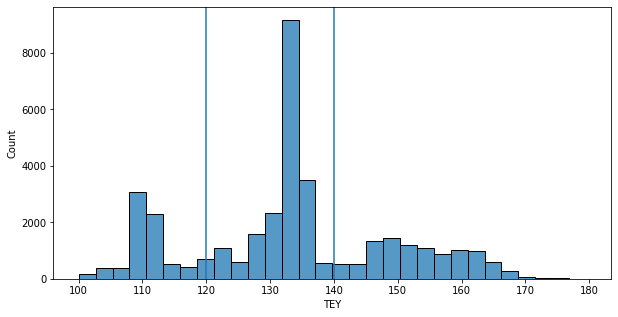

In [37]:
### let's visualize the histogram again
%matplotlib inline
plt.figure(figsize=(10,5))
sns.histplot(raw_data['TEY'], bins = 30)
plt.axvline(120, ymin=0, ymax=6000)
plt.axvline(140, ymin=0, ymax=6000)

In [88]:
idx_group_one = np.where((raw_data['TEY'] >= min(raw_data['TEY'])) & (raw_data['TEY'] < 120)); print(len(idx_group_one[0]))
idx_group_two = np.where((raw_data['TEY'] >= 120) & (raw_data['TEY'] < 140)); print(len(idx_group_two[0]))
idx_group_three = np.where(raw_data['TEY'] >= 140); print(len(idx_group_three[0]))

### Just to confirm that all observations were selected

print(len(idx_group_one[0])+len(idx_group_two[0])+len(idx_group_three[0]), len(raw_data['TEY']))

print('group 1', len(idx_group_one[0])/len(raw_data['TEY']))
print('group 2', len(idx_group_two[0])/len(raw_data['TEY']))
print('group 3', len(idx_group_three[0])/len(raw_data['TEY']))

7560
19223
9950
36733 36733
group 1 0.2058094901042659
group 2 0.523316908501892
group 3 0.27087360139384203


### Adding the new categorical feature

In [60]:
raw_data.insert(len(raw_data.columns), 'TEY_Categories', ['']*len(raw_data))
raw_data.iloc[idx_group_one[0], 12] = '< 120 MWH'
raw_data.iloc[idx_group_two[0], 12] = '120 MWH <= x < 140 MWH'
raw_data.iloc[idx_group_three[0], 12] = '>= 140 MWH'

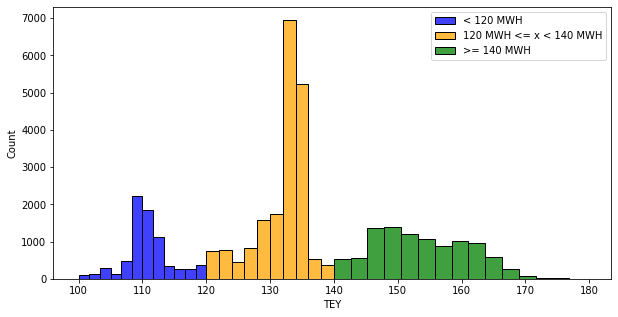

In [95]:
### let's plot the new histogram
plt.figure(figsize=(10,5))
sns.histplot(x = raw_data[raw_data['TEY_Categories'] =='< 120 MWH']['TEY'], label = '< 120 MWH', color='blue',bins = 12)
sns.histplot(x = raw_data[raw_data['TEY_Categories'] =='120 MWH <= x < 140 MWH']['TEY'], label = '120 MWH <= x < 140 MWH', color='orange',bins = 10)
sns.histplot(x = raw_data[raw_data['TEY_Categories'] =='>= 140 MWH']['TEY'], label = '>= 140 MWH',color='green',bins = 15)
plt.legend()

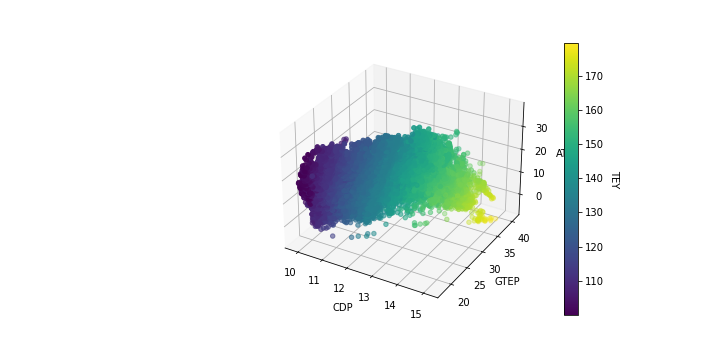

In [165]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points

scatter = ax.scatter3D(subset['CDP'], subset['GTEP'], subset['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('CDP')
ax.set_ylabel('GTEP')
ax.set_zlabel('AT')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

# Let's visualize our data again, but by applying data transformation, such as MaxMinRange and Standerdization

In [163]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_range = MinMaxScaler(); scaler_standard = StandardScaler()

range_data = scaler_range.fit_transform(subset); standard_data = scaler_standard.fit_transform(subset)

range_data = pd.DataFrame(range_data, columns=subset.columns); standard_data = pd.DataFrame(standard_data, columns=subset.columns)

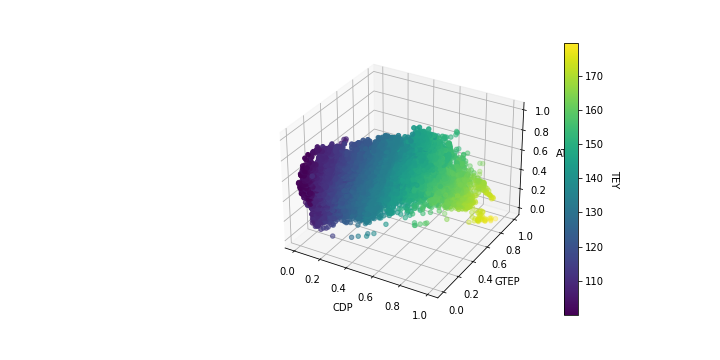

In [168]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(range_data['CDP'], range_data['GTEP'], range_data['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('CDP')
ax.set_ylabel('GTEP')
ax.set_zlabel('AT')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

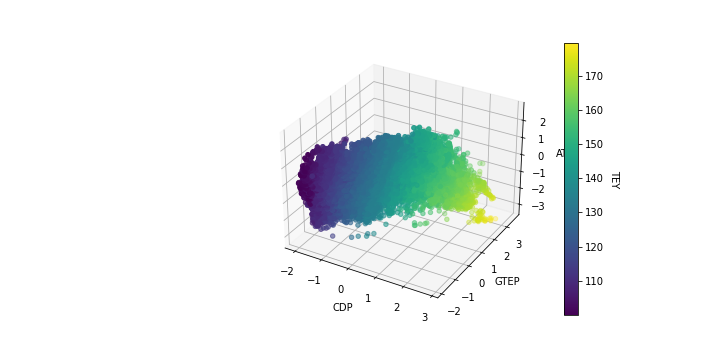

In [169]:
%matplotlib widget
fig = plt.figure(figsize=(10,5))

ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points

scatter = ax.scatter3D(standard_data['CDP'], standard_data['GTEP'], standard_data['AT'], c=raw_data['TEY'], cmap='viridis')
ax.set_xlabel('CDP')
ax.set_ylabel('GTEP')
ax.set_zlabel('AT')
colorbar = fig.colorbar(scatter)
colorbar.set_label('TEY', rotation=270, labelpad=15)
plt.show()

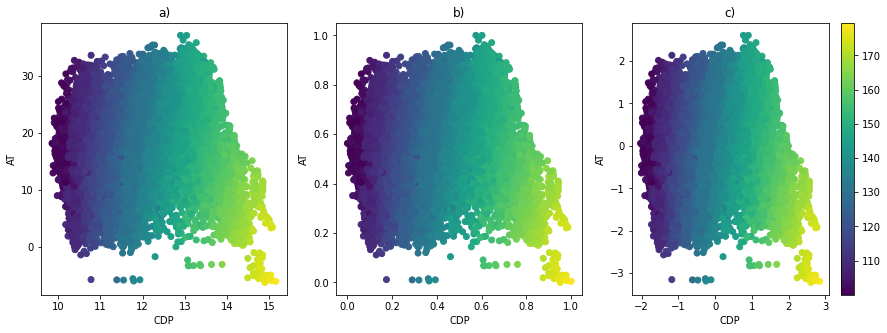

In [188]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(subset['CDP'],subset['AT'], c = raw_data['TEY'],cmap = 'viridis')
plt.xlabel('CDP'); plt.ylabel('AT'); plt.title('a)')
plt.subplot(1,3,2)
plt.scatter(range_data['CDP'],range_data['AT'], c = raw_data['TEY'],cmap = 'viridis')
plt.xlabel('CDP'); plt.ylabel('AT'); plt.title('b)')
plt.subplot(1,3,3)
plt.scatter(standard_data['CDP'],standard_data['AT'], c = raw_data['TEY'],cmap = 'viridis')
plt.xlabel('CDP'); plt.ylabel('AT'); plt.title('c)')
plt.colorbar()


# PCA Analysis

In [103]:
### Different variances (big differences) and different metrics, we probably should apply standerization or range scaling
print(np.var(subset))

CDP       1.185443
TIT     307.516004
GTEP     17.605580
AFDP      0.598960
TAT      46.816622
AT       55.463020
dtype: float64


In [195]:
def kaiser_and_explained(explained_variance_, explained_variance_ratio, percentage):
    
    comp = np.count_nonzero(explained_variance_ > np.mean(explained_variance_))
    total = 0
    percentage = percentage/100
    for i in range(len(explained_variance_ratio)):
        
        if total >= percentage:
            
            return total, i, comp
        
        else:

            total+=explained_variance_ratio[i]
    

def return_values_given_components(pca_values, components):

    return pca_values[:,:components]


In [196]:
from sklearn.decomposition import PCA

pca = PCA()
### PCA on the not scaled data
print('Non-Scaled')
pca_data_notScaled = pca.fit_transform(subset)

total_variance_explained_notScaled, components_notScaled, kaiser_notScaled = kaiser_and_explained(pca.explained_variance_, pca.explained_variance_ratio_,90)
print('Total variance explained:',np.round(total_variance_explained_notScaled*100,2),'%', 'N.º of components (by total variance explined):',components_notScaled,\
     'N.º of components (by kaiser criteria):',kaiser_notScaled,'\n')

final_notScaled = return_values_given_components(pca_data_notScaled, components_notScaled)

### PCA on the range scaled data
print('MinMaxScaler')
pca_data_range = pca.fit_transform(range_data)

total_variance_explained_range, components_range, kaiser_range = kaiser_and_explained(pca.explained_variance_, pca.explained_variance_ratio_,90)
print('Total variance explained:',np.round(total_variance_explained_range*100,2),'%', 'N.º of components (by total variance explined):',components_range,\
     'N.º of components (by kaiser criteria):',kaiser_range,'\n')

final_range = return_values_given_components(pca_data_range, components_range)

### PCA on the standard scaled data
print('StandardScaler')
pca_data_standard = pca.fit_transform(standard_data)

total_variance_explained_standard, components_standard, kaiser_standard = kaiser_and_explained(pca.explained_variance_, pca.explained_variance_ratio_,90)
print('Total variance explained:',np.round(total_variance_explained_standard*100,2),'%', 'N.º of components (by total variance explined):',components_standard,\
     'N.º of components (by kaiser criteria):',kaiser_standard,'\n')

final_standard = return_values_given_components(pca_data_standard, components_standard)

Non-Scaled
Total variance explained: 93.12 % N.º of components (by total variance explined): 2 N.º of components (by kaiser criteria): 1 

MinMaxScaler
Total variance explained: 94.98 % N.º of components (by total variance explined): 3 N.º of components (by kaiser criteria): 2 

StandardScaler
Total variance explained: 93.45 % N.º of components (by total variance explined): 3 N.º of components (by kaiser criteria): 2 



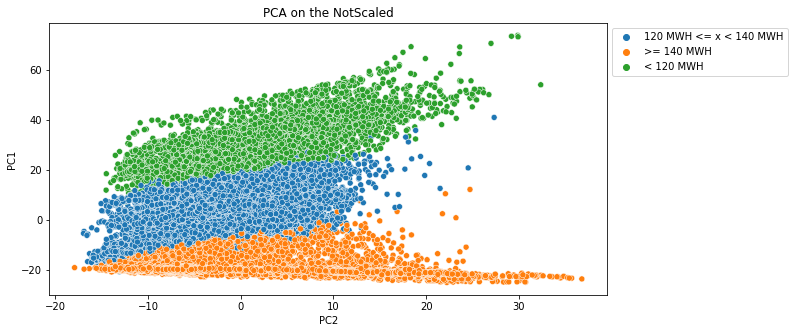

In [151]:
%matplotlib inline
plt.figure(figsize=(10,5))
sns.scatterplot(final_notScaled[:,1], final_notScaled[:,0], hue=raw_data['TEY_Categories'], cmap = 'viridis')
plt.title('PCA on the NotScaled')
plt.ylabel('PC1'); plt.xlabel('PC2')
plt.legend(bbox_to_anchor = (1,1))

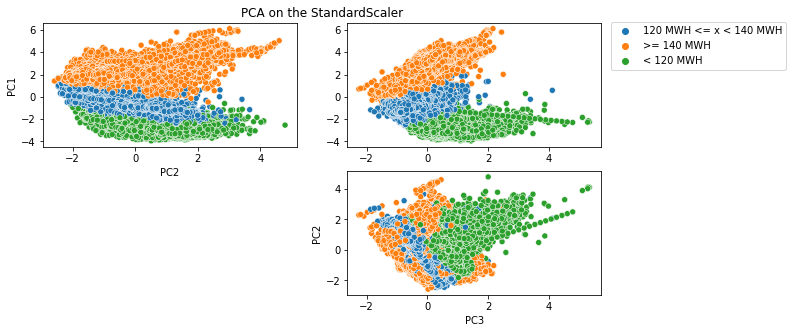

In [150]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.scatterplot(final_standard[:,1], final_standard[:,0], hue=raw_data['TEY_Categories'], cmap = 'viridis', legend=False)
plt.title('PCA on the StandardScaler', {'x': 1.1, 'y':0})
plt.ylabel('PC1'); plt.xlabel('PC2')
plt.subplot(2,2,2)
sns.scatterplot(final_standard[:,2], final_standard[:,0], hue=raw_data['TEY_Categories'], cmap = 'viridis', legend=False)
plt.subplot(2,2,4)
sns.scatterplot(final_standard[:,2], final_standard[:,1], hue=raw_data['TEY_Categories'], cmap = 'viridis')
plt.ylabel('PC2'); plt.xlabel('PC3')
plt.legend(bbox_to_anchor = (1.75,2.25))

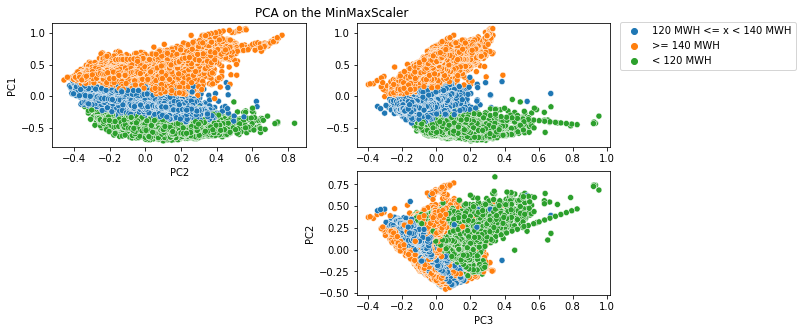

In [147]:
%matplotlib inline
plt.figure(figsize=(10,5) )
plt.subplot(2,2,1)
sns.scatterplot(final_range[:,1], final_range[:,0], hue=raw_data['TEY_Categories'], cmap = 'viridis', legend=False)
plt.title('PCA on the MinMaxScaler', {'x': 1.1, 'y':0})
plt.ylabel('PC1'); plt.xlabel('PC2')
plt.subplot(2,2,2)
sns.scatterplot(final_range[:,2], final_range[:,0], hue=raw_data['TEY_Categories'], cmap = 'viridis', legend=False)
plt.subplot(2,2,4)
sns.scatterplot(final_range[:,2], final_range[:,1], hue=raw_data['TEY_Categories'], cmap = 'viridis')
plt.ylabel('PC2'); plt.xlabel('PC3')
plt.legend(bbox_to_anchor = (1.75,2.25))

## After the analysis, we decided that the selected components should be 3

In [208]:
pca.components_[:3].T


array([[ 0.4992632 ,  0.05536529, -0.17273018],
       [ 0.45502461, -0.19308627, -0.54199059],
       [ 0.4923604 ,  0.04221527, -0.13760569],
       [ 0.4088383 , -0.23179789,  0.39294354],
       [-0.36407997, -0.45913655, -0.62202319],
       [ 0.03958673, -0.83266657,  0.34081915]])